## Course Description
This course extends Intermediate Python for Data Science to provide a stronger foundation in data visualization in Python. The course provides a broader coverage of the Matplotlib library and an overview of Seaborn (a package for statistical graphics). Topics covered include customizing graphics, plotting two-dimensional arrays (e.g., pseudocolor plots, contour plots, images, etc.), statistical graphics (e.g., visualizing distributions & regressions), and working with time series and image data.

### Customizing plots
Following a review of basic plotting with Matplotlib, this chapter delves into customizing plots using Matplotlib. This includes overlaying plots, making subplots, controlling axes, adding legends and annotations, and using different plot styles.

### Multiple plots on single axis
It is time now to put together some of what you have learned and combine line plots on a common set of axes. The data set here comes from records of undergraduate degrees awarded to women in a variety of fields from 1970 to 2011. You can compare trends in degrees most easily by viewing two curves on the same set of axes.

Here, three NumPy arrays have been pre-loaded for you: year (enumerating years from 1970 to 2011 inclusive), physical_sciences (representing the percentage of Physical Sciences degrees awarded to women each in corresponding year), and computer_science (representing the percentage of Computer Science degrees awarded to women in each corresponding year).

You will issue two plt.plot() commands to draw line plots of different colors on the same set of axes. Here, year represents the x-axis, while physical_sciences and computer_science are the y-axes.

In [1]:
#How to check the version of matplotlib
import matplotlib
matplotlib.__version__
#!pip install matplotlib
!pip install matplotlib upgrade

  Could not find a version that satisfies the requirement upgrade (from versions: )
No matching distribution found for upgrade


In [2]:
import pandas as pd
#df = pd.read_csv('percent-bachelors-degrees-women-usa.csv', index_col = 0) #index_col IS NOT col
df = pd.read_csv('percent-bachelors-degrees-women-usa.csv', index_col = None)
year = df['Year'].values # note values()
physical_sciences = df['Physical Sciences'].values
computer_science = df['Computer Science']
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences, color ='blue')
#color cannot be col.

# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(year,computer_science,color = 'red')

# Display the plot
plt.show()


* Check plt.plot with Ctrl+Tab and find the most important features of this function. If x-axis data is missed, then it will automatically add data or using the index from pandas-Series, etc. 
* plt.xticks(`[]`) can turn off ticks. Note this is different from turning off the axis, which is achieved with a different function. 

use plt.plot multiple times to draw curves on the same axis. Other ways around?

### Using axes()
Rather than overlaying line plots on common axes, you may prefer to plot different line plots on distinct axes. The command plt.axes() is one way to do this (but it requires specifying coordinates relative to the size of the figure).

Here, you have the same three arrays year, physical_sciences, and computer_science representing percentages of degrees awarded to women over a range of years. You will use plt.axes() to create separate sets of axes in which you will draw each line plot.

In calling plt.axes([xlo, ylo, width, height]), a set of axes is created and made active with lower corner at coordinates (xlo, ylo) of the specified width and height. Note that these coordinates can be passed to plt.axes() in the form of a list or a tuple.

The coordinates and lengths are values between 0 and 1 representing lengths relative to the dimensions of the figure. After issuing a plt.axes() command, plots generated are put in that set of axes.

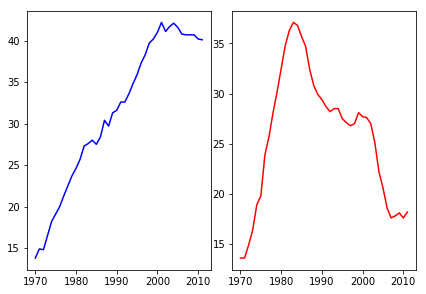

In [3]:
# Create plot axes for the first line plot
plt.axes([0.05,0.05,0.425,0.9]) 
#Must be in the form of list

# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences, color='blue')

# Create plot axes for the second line plot
plt.axes([0.525,0.05,0.425,0.9])

# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(year,computer_science,color = 'red')


As you can see, not only are there now two separate plots with their own axes, but the axes for each plot are **slightly different**.

### Using subplot() (1)
The command plt.axes() **requires a lot of effort to use well** because the coordinates of the axes need to be set manually. A better alternative is to use plt.subplot() to determine the layout automatically.

In this exercise, you will continue working with the same arrays from the previous exercises: year, physical_sciences, and computer_science. Rather than using plt.axes() to explicitly lay out the axes, you will use plt.subplot(m, n, k) to make the subplot grid of dimensions m by n and to make the kth subplot active (subplots are numbered starting from 1 row-wise from the top left corner of the subplot grid).

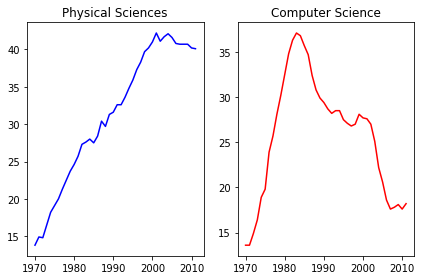

In [4]:
# Create a figure with 1x2 subplot and make the left subplot active
plt.subplot(1,2,1)

# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences, color='blue')
plt.title('Physical Sciences')

# Make the right subplot active in the current 1x2 subplot grid
plt.subplot(1,2,2)

# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(year, computer_science, color='red')
plt.title('Computer Science')

# Use plt.tight_layout() to improve the spacing between subplots
plt.tight_layout()
plt.show()

The plt.tight_layout() above seems not useful?

### Using subplot() (2)
Now you have some familiarity with plt.subplot(), you can use it to plot more plots in larger grids of subplots of the same figure.

Here, you will make a 2×2 grid of subplots and plot the percentage of degrees awarded to women in Physical Sciences (using physical_sciences), in Computer Science (using computer_science), in Health Professions (using health), and in Education (using education).

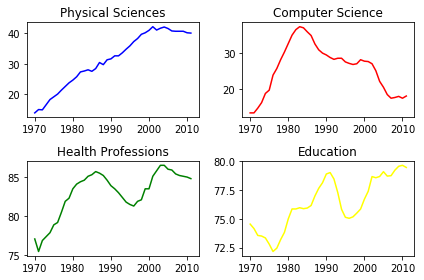

In [5]:
#print(df.columns)
health = df['Health Professions'].values
education = df["Education"]
# Create a figure with 2x2 subplot layout and make the top left subplot active
plt.subplot(2,2,1)

# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences, color='blue')
plt.title('Physical Sciences')

# Make the top right subplot active in the current 2x2 subplot grid 
plt.subplot(2,2,2)

# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(year, computer_science, color='red')
plt.title('Computer Science')

# Make the bottom left subplot active in the current 2x2 subplot grid
plt.subplot(2,2,3)

# Plot in green the % of degrees awarded to women in Health Professions
plt.plot(year, health, color='green')
plt.title('Health Professions')

# Make the bottom right subplot active in the current 2x2 subplot grid
plt.subplot(2,2,4)

# Plot in yellow the % of degrees awarded to women in Education
plt.plot(year, education, color='yellow')
plt.title('Education')

# # Improve the spacing between subplots and display them
plt.tight_layout()
plt.show()


### Using xlim(), ylim()
In this exercise, you will work with the matplotlib.pyplot interface to quickly set the x- and y-limits of your plots.

You will now create the same figure as in the previous exercise using plt.plot(), this time setting the axis extents using plt.xlim() and plt.ylim(). These commands allow you to either zoom or expand the plot or to set the axis ranges to include important values (such as the origin).

In this exercise, as before, the percentage of women graduates in Computer Science and in the Physical Sciences are held in the variables computer_science and physical_sciences respectively over year.

After creating the plot, you will use plt.savefig() to export the image produced to a file.

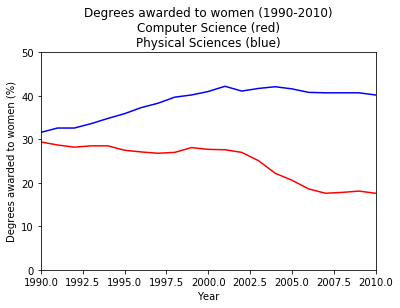

In [6]:
# Plot the % of degrees awarded to women in Computer Science and the Physical Sciences
plt.plot(year,computer_science, color='red') 
plt.plot(year, physical_sciences, color='blue')

# Add the axis labels
plt.xlabel('Year')
plt.ylabel('Degrees awarded to women (%)')

# Set the x-axis range
plt.xlim([1990,2010])

# Set the y-axis range
plt.ylim([0,50])

# Add a title and display the plot
plt.title('Degrees awarded to women (1990-2010)\nComputer Science (red)\nPhysical Sciences (blue)')
plt.show()

# Save the image as 'xlim_and_ylim.png'
plt.savefig('xlim_and_ylim.png')


### Using axis()
Using plt.xlim() and plt.ylim() are useful for setting the axis limits individually. In this exercise, you will see how you can pass a 4-tuple to plt.axis() to set limits **for both axes at once**. For example, plt.axis((1980,1990,0,75)) would set the extent of the x-axis to the period between 1980 and 1990, and would set the y-axis extent from 0 to 75% degrees award.

Once again, the percentage of women graduates in Computer Science and in the Physical Sciences are held in the variables computer_science and physical_sciences where each value was measured at the corresponding year held in the year variable.


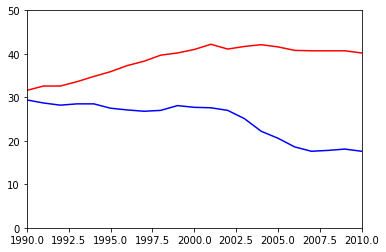

In [7]:
# Plot in blue the % of degrees awarded to women in Computer Science
plt.plot(year,computer_science, color='blue')

# Plot in red the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences,color='red')

# Set the x-axis and y-axis limits
plt.axis((1990,2010,0,50))

# Show the figure
plt.show()

# Save the figure as 'axis_limits.png'
plt.savefig("axis_limits.png")


Using plt.axis() allows you to set limits for both axes at once, as opposed to setting them individually with plt.xlim() and plt.ylim().

### Using legend()
Legends are useful for distinguishing between multiple datasets displayed on common axes. The relevant data are created using specific line colors or markers in various plot commands. Using the keyword argument label in the plotting function associates a string to use in a legend.

For example, here, you will plot enrollment of women in the Physical Sciences and in Computer Science over time. You can label each curve by passing a label argument to the plotting call, and request a legend using plt.legend(). Specifying the keyword argument loc determines where the legend will be placed.

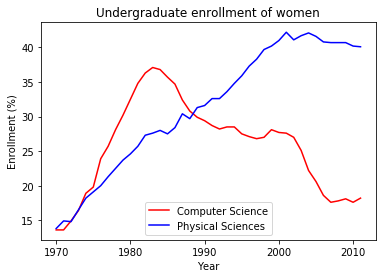

In [8]:
# Specify the label 'Computer Science'
plt.plot(year, computer_science, color='red', label='Computer Science') 

# Specify the label 'Physical Sciences' 
plt.plot(year, physical_sciences, color='blue', label='Physical Sciences')

# Add a legend at the lower center
plt.legend(loc='lower center')

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Enrollment (%)')
plt.title('Undergraduate enrollment of women')
plt.show()


Distinguish: xlabel, ylabel, title, legend: two steps: (1) use label in the plt.plot to specify the contents of legend. (2) use plt.legend( loc = 'lower center') to specify the position of legend.

### Using annotate()
It is often useful to annotate a simple plot to provide context. This makes the plot more readable and can highlight specific aspects of the data. Annotations like text and arrows can be used to emphasize specific observations.

Here, you will once again plot enrollment of women in the Physical Sciences and Computer science over time. The legend is set up as before. Additionally, you will mark the inflection point when enrollment of women in Computer Science reached a peak and started declining using plt.annotate().

To enable an arrow, set arrowprops=dict(facecolor='black'). The arrow will point to the location given by xy and the text will appear at the location given by xytext.

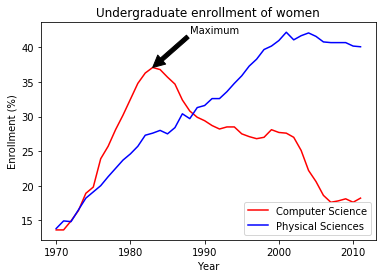

37.1

In [9]:
# Plot with legend as before
plt.plot(year, computer_science, color='red', label='Computer Science') 
plt.plot(year, physical_sciences, color='blue', label='Physical Sciences')
plt.legend(loc='lower right')

# Compute the maximum enrollment of women in Computer Science: cs_max
cs_max = computer_science.max()

# Calculate the year in which there was maximum enrollment of women in Computer Science: yr_max
yr_max = year[computer_science.idxmax()]

# Add a black arrow annotation
plt.annotate('Maximum', xy=(yr_max, cs_max), xytext=(yr_max+5, cs_max+5), arrowprops=dict(facecolor='black'))

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Enrollment (%)')
plt.title('Undergraduate enrollment of women')
plt.show()
cs_max


### Modifying styles
Matplotlib comes with a number of different stylesheets to customize the overall look of different plots. To activate a particular stylesheet you can simply call plt.style.use() with the name of the style sheet you want. To list all the available style sheets you can execute: print(plt.style.available).

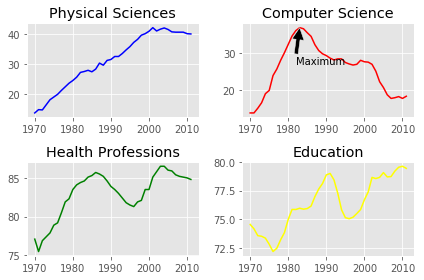

In [10]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Set the style to 'ggplot'
plt.style.use('ggplot')

# Create a figure with 2x2 subplot layout
plt.subplot(2, 2, 1) 

# Plot the enrollment % of women in the Physical Sciences
plt.plot(year, physical_sciences, color='blue')
plt.title('Physical Sciences')

# Plot the enrollment % of women in Computer Science
plt.subplot(2, 2, 2)
plt.plot(year, computer_science, color='red')
plt.title('Computer Science')

# Add annotation
cs_max = computer_science.max()
yr_max = year[computer_science.idxmax()]
plt.annotate('Maximum', xy=(yr_max, cs_max), xytext=(yr_max-1, cs_max-10), arrowprops=dict(facecolor='black'))

# Plot the enrollmment % of women in Health professions
plt.subplot(2, 2, 3)
plt.plot(year, health, color='green')
plt.title('Health Professions')

# Plot the enrollment % of women in Education
plt.subplot(2, 2, 4)
plt.plot(year, education, color='yellow')
plt.title('Education')

# Improve spacing between subplots and display them
plt.tight_layout()
plt.show()

In [11]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


## Plotting 2D arrays

This chapter showcases various techniques for visualizing two-dimensional arrays. This includes the use, presentation, and orientation of grids for representing two-variable functions followed by discussions of pseudocolor plots, contour plots, color maps, two-dimensional histograms, and images.

### Generating meshes
In order to visualize two-dimensional arrays of data, it is necessary to understand how to generate and manipulate 2-D arrays. Many Matplotlib plots support arrays as input and in particular, they support NumPy arrays. The NumPy library is the most widely-supported means for supporting numeric arrays in Python.

In this exercise, you will use the meshgrid function in NumPy to generate 2-D arrays which you will then visualize using plt.imshow(). The simplest way to generate a meshgrid is as follows:

import numpy as np
Y,X = np.meshgrid(range(10),range(20))
This will create two arrays with a shape of (20,10), which corresponds to 20 rows along the Y-axis and 10 columns along the X-axis. In this exercise, you will use np.meshgrid() to generate a regular 2-D sampling of a mathematical function.

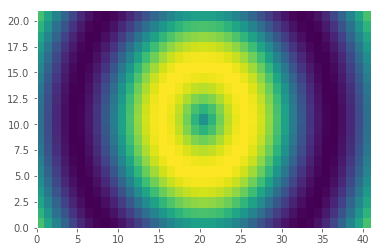

In [12]:
# Import numpy and matplotlib.pyplot
import matplotlib.pyplot as plt
import numpy as np

# Generate two 1-D arrays: u, v
u = np.linspace(-2, 2, 41)
v = np.linspace(-1, 1, 21)
#Note linspace is not linespace

# Generate 2-D arrays from u and v: X, Y
X,Y = np.meshgrid(u,v)

# Compute Z based on X and Y
Z = np.sin(3*np.sqrt(X**2 + Y**2)) 

# Display the resulting image with pcolor()
plt.pcolor(Z)
plt.show()

# Save the figure to 'sine_mesh.png'
plt.savefig('sine_mesh.png')



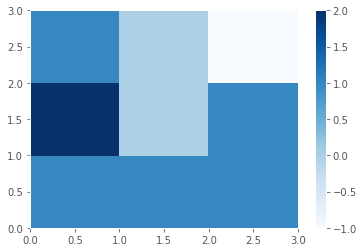

In [13]:
A = np.array([[1, 1, 1], [2, 0, 1], [1, 0, -1]])
plt.pcolor(A, cmap='Blues')
plt.colorbar()
plt.show()

Be very careful of the order!
### Contour & filled contour plots
Although **plt.imshow() or plt.pcolor()** are often used to visualize a 2-D array in entirety, there are other ways of visualizing such data without displaying all the available sample values. One option is to use the array to compute **contours** that are visualized instead.

For now, I have already three ways of plotting 2D graph.

Two types of contour plot supported by Matplotlib are plt.contour() and plt.contourf() where the former displays the contours as lines and the latter displayed filled areas between contours. Both these plotting commands accept a two dimensional array from which the appropriate contours are computed.

In this exercise, you will visualize a 2-D array repeatedly using both plt.contour() and plt.contourf(). You will use plt.subplot() to display several contour plots in a common figure, using the meshgrid X, Y as the axes. For example, plt.contour(X, Y, Z) generates a default contour map of the array Z.

Here X, Y, Z are all (51,101) shape. But not available in the following. So I generate a new set of data.


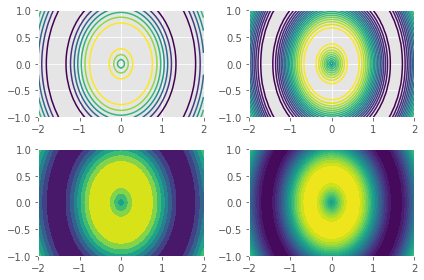

In [14]:
# Import numpy and matplotlib.pyplot
import matplotlib.pyplot as plt
import numpy as np

# Generate two 1-D arrays: u, v
u = np.linspace(-2, 2, 51)
v = np.linspace(-1, 1, 101)
#Note linspace is not linespace

# Generate 2-D arrays from u and v: X, Y
X,Y = np.meshgrid(u,v)

# Compute Z based on X and Y
Z = np.sin(3*np.sqrt(X**2 + Y**2)) 


# Generate a default contour map of the array Z
plt.subplot(2,2,1)
plt.contour(X,Y,Z)

# Generate a contour map with 20 contours
plt.subplot(2,2,2)
plt.contour(X,Y,Z,20)

# Generate a default filled contour map of the array Z
plt.subplot(2,2,3)
plt.contourf(X,Y,Z)

# Generate a default filled contour map with 20 contours
plt.subplot(2,2,4)
plt.contourf(X,Y,Z,20)

# Improve the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()



### Modifying colormaps
When displaying a 2-D array with plt.imshow() or plt.pcolor(), the values of the array are mapped to a corresponding color. The set of colors used is determined by a colormap which smoothly maps values to colors, making it easy to understand the structure of the data at a glance.

It is often useful to change the colormap from the default 'jet' colormap used by matplotlib. A good colormap is visually pleasing and conveys the structure of the data faithfully and in a way that makes sense for the application.

Some matplotlib colormaps have unique names such as 'jet', 'coolwarm', 'magma' and 'viridis'.
Others have a naming scheme based on overall color such as 'Greens', 'Blues', 'Reds', and 'Purples'.
Another four colormaps are based on the seasons, namely 'summer', 'autumn', 'winter' and 'spring'.
You can insert the option cmap=<name> into most matplotlib functions to change the color map of the resulting plot.
In this exercise, you will explore four different colormaps together using plt.subplot(). You will use a pregenerated array Z and a meshgrid X, Y to generate the same filled contour plot with four different color maps. Be sure to also add a color bar to each filled contour plot with plt.colorbar().

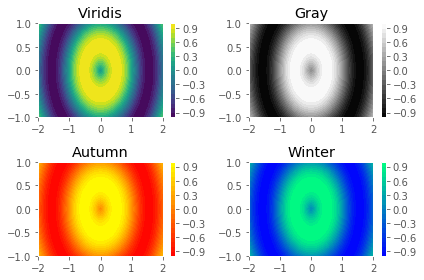

In [15]:
# Create a filled contour plot with a color map of 'viridis'
plt.subplot(2,2,1)
plt.contourf(X,Y,Z,20, cmap ='viridis')
plt.colorbar()
plt.title('Viridis')

# Create a filled contour plot with a color map of 'gray'
plt.subplot(2,2,2)
plt.contourf(X,Y,Z,20, cmap ='gray')
plt.colorbar()
plt.title('Gray')

# Create a filled contour plot with a color map of 'autumn'
plt.subplot(2,2,3)
plt.contourf(X,Y,Z,20,cmap = 'autumn') # cannot be 'Autumn'
plt.colorbar()
plt.title('Autumn')

# Create a filled contour plot with a color map of 'winter'
plt.subplot(2,2,4)
plt.contourf(X,Y,Z,20,cmap = 'winter') # cannot be 'Winter'
plt.colorbar()
plt.title('Winter')

# Improve the spacing between subplots and display them
plt.tight_layout()
plt.show()

### Using hist2d()
Given a set of ordered pairs describing data points, you can count the number of points with similar values to construct a two-dimensional histogram. This is similar to a one-dimensional histogram, but it describes the joint variation of two random variables rather than just one.

In matplotlib, one function to visualize 2-D histograms is plt.hist2d().

You specify the coordinates of the points using plt.hist2d(x,y) assuming x and y are two vectors of the same length.
You can specify the number of bins with the argument bins=(nx, ny) where nx is the number of bins to use in the horizontal direction and ny is the number of bins to use in the vertical direction.
You can specify the rectangular region in which the samples are counted in constructing the 2D histogram. The optional parameter required is range=((xmin, xmax), (ymin, ymax)) where
xmin and xmax are the respective lower and upper limits for the variables on the x-axis and
ymin and ymax are the respective lower and upper limits for the variables on the y-axis. Notice that the optional range argument can use nested tuples or lists.
In this exercise, you'll use some data from the auto-mpg data set. There are two arrays mpg and hp that respectively contain miles per gallon and horse power ratings from over three hundred automobiles built.

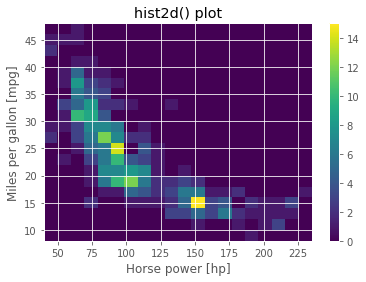

In [16]:
import pandas as pd

df = pd.read_csv('auto-mpg.csv')
hp = df['hp'].values
mpg = df['mpg'].values
# Generate a 2-D histogram
plt.hist2d(hp,mpg,bins =(20,20),range = ((40,235),(8,48)))

# Add a color bar to the histogram
plt.colorbar()

# Add labels, title, and display the plot
plt.xlabel('Horse power [hp]')
plt.ylabel('Miles per gallon [mpg]')
plt.title('hist2d() plot')
plt.show()

### Using hexbin()
The function plt.hist2d() uses rectangular bins to construct a two dimensional histogram. As an alternative, the function plt.hexbin() uses hexagonal bins. The underlying algorithm (based on this article from 1987) constructs a hexagonal tesselation of a planar region and aggregates points inside hexagonal bins.

The optional gridsize argument (default 100) gives the number of hexagons across the x-direction used in the hexagonal tiling. If specified as a list or a tuple of length two, gridsize fixes the number of hexagon in the x- and y-directions respectively in the tiling.
The optional parameter extent=(xmin, xmax, ymin, ymax) specifies rectangular region covered by the hexagonal tiling. In that case, xmin and xmax are the respective lower and upper limits for the variables on the x-axis and ymin and ymax are the respective lower and upper limits for the variables on the y-axis.
In this exercise, you'll use the same auto-mpg data as in the last exercise (again using arrays mpg and hp). This time, you'll use plt.hexbin() to visualize the two-dimensional histogram.


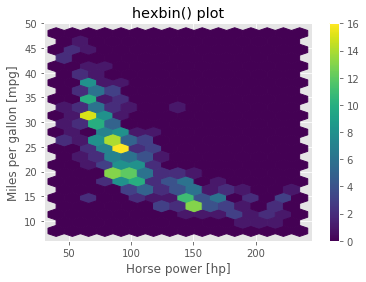

In [17]:
# Generate a 2d histogram with hexagonal bins
plt.hexbin(hp,mpg,gridsize = (15,12),extent = (40,235,8,48))

           
# Add a color bar to the histogram
plt.colorbar()

# Add labels, title, and display the plot
plt.xlabel('Horse power [hp]')
plt.ylabel('Miles per gallon [mpg]')
plt.title('hexbin() plot')
plt.show()


### Loading, examining images
Color images such as photographs contain the intensity of the red, green and blue color channels.

To read an image from file, use plt.imread() by passing the path to a file, such as a PNG or JPG file.
The color image can be plotted as usual using plt.imshow().
The resulting image loaded is a NumPy array of three dimensions. The array typically has dimensions M×N×3, where M×N is the dimensions of the image. The third dimensions are referred to as color channels (typically red, green, and blue).
The color channels can be extracted by Numpy array slicing.
In this exercise, you will load & display an image of an astronaut (by NASA (Public domain), via Wikimedia Commons). You will also examine its attributes to understand how color images are represented.

(480, 480, 3)


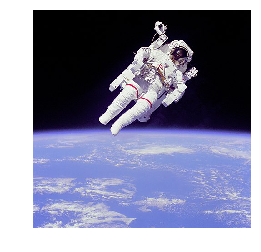

In [18]:
# Load the image into an array: img
img = plt.imread('480px-Astronaut-EVA.jpg')

# Print the shape of the image
print(img.shape)

# Display the image
plt.imshow(img)

# Hide the axes
plt.axis('off')
plt.show()


### Pseudocolor plot from image data
Image data comes in many forms and it is not always appropriate to display the available channels in RGB space. In many situations, an image may be processed and analysed in some way before it is visualized in pseudocolor, also known as 'false' color.

In this exercise, you will perform a simple analysis using the image showing an astronaut as viewed from space. Instead of simply displaying the image, you will compute the total intensity across the red, green and blue channels. The result is a single two dimensional array which you will display using plt.imshow() with the 'gray' colormap.

(480, 480, 3)
(480, 480)


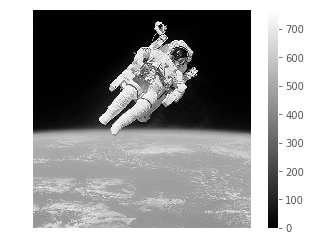

In [19]:
# Load the image into an array: img
img = plt.imread('480px-Astronaut-EVA.jpg')

# Print the shape of the image
print(img.shape)

# Compute the sum of the red, green and blue channels: intensity
intensity = img.sum(axis =2 )

# Print the shape of the intensity
print(intensity.shape)

# Display the intensity with a colormap of 'gray'
plt.imshow(intensity,cmap = 'gray')

# Add a colorbar
plt.colorbar()

# Hide the axes and show the figure
plt.axis('off')
plt.show()


### Extent and aspect
When using plt.imshow() to display an array, the default behavior is to keep pixels square so that the height to width ratio of the output matches the ratio determined by the shape of the array. In addition, by default, the x- and y-axes are labeled by the number of samples in each direction.

The ratio of the displayed width to height is known as the image aspect and the range used to label the x- and y-axes is known as the image extent. The default aspect value of 'auto' keeps the pixels square and the extents are automatically computed from the shape of the array if not specified otherwise.

In this exercise, you will investigate how to set these options explicitly by plotting the same image in a 2 by 2 grid of subplots with distinct aspect and extent options.

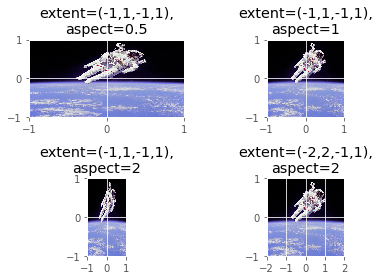

In [20]:
# Load the image into an array: img
img = plt.imread('480px-Astronaut-EVA.jpg')

# Specify the extent and aspect ratio of the top left subplot
plt.subplot(2,2,1)
plt.title('extent=(-1,1,-1,1),\naspect=0.5') 
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-1,1,-1,1), aspect=0.5)

# Specify the extent and aspect ratio of the top right subplot
plt.subplot(2,2,2)
plt.title('extent=(-1,1,-1,1),\naspect=1')
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.imshow(img, extent =(-1,1,-1,1), aspect = 1)

# Specify the extent and aspect ratio of the bottom left subplot
plt.subplot(2,2,3)
plt.title('extent=(-1,1,-1,1),\naspect=2')
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.imshow(img, extent =(-1,1,-1,1), aspect = 2)

# Specify the extent and aspect ratio of the bottom right subplot
plt.subplot(2,2,4)
plt.title('extent=(-2,2,-1,1),\naspect=2')
plt.xticks([-2,-1,0,1,2])
plt.yticks([-1,0,1])
plt.imshow(img,extent = (-2,2,-1,1),aspect = 2)

# Improve spacing and display the figure
plt.tight_layout()
plt.show()

### Rescaling pixel intensities
Sometimes, low contrast images can be improved by rescaling their intensities. For instance, this image of Hawkes Bay, New Zealand (originally by Phillip Capper, modified by User:Konstable, via Wikimedia Commons, CC BY 2.0) has no pixel values near 0 or near 255 (the limits of valid intensities).

For this exercise, you will do a simple rescaling (remember, an image is NumPy array) to translate and stretch the pixel intensities so that the intensities of the new image fill the range from 0 to 255.

The smallest & largest pixel intensities are 104 & 230.
The rescaled smallest & largest pixel intensities are 0.0 & 256.0.


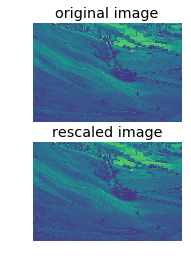

In [21]:
# Load the image into an array: image
image = plt.imread('640px-Unequalized_Hawkes_Bay_NZ.jpg')

# Extract minimum and maximum values from the image: pmin, pmax
pmin, pmax = image.min(), image.max()
print("The smallest & largest pixel intensities are %d & %d." % (pmin, pmax))

# Rescale the pixels: rescaled_image
rescaled_image = 256*(image - pmin) / (pmax - pmin)
print("The rescaled smallest & largest pixel intensities are %.1f & %.1f." % 
      (rescaled_image.min(), rescaled_image.max()))

# Display the original image in the top subplot
plt.subplot(2,1,1)
plt.title('original image')
plt.axis('off')
plt.imshow(image)

# Display the rescaled image in the bottom subplot
plt.subplot(2,1,2)
plt.title('rescaled image')
plt.axis('off')
plt.imshow(rescaled_image)

plt.show()

## Statistical plots with Seaborn
This is a high-level tour of the Seaborn plotting library for producing statistical graphics in Python. The tour covers Seaborn tools for computing and visualizing linear regressions as well as tools for visualizing univariate distributions (e.g., strip, swarm, and violin plots) and multivariate distributions (e.g., joint plots, pair plots, and heatmaps). This also includes a discussion of grouping categories in plots.

### Simple linear regressions
As you have seen, seaborn provides a convenient interface to generate complex and great-looking statistical plots. One of the simplest things you can do using seaborn is to fit and visualize a simple linear regression between two variables using sns.lmplot().

One difference between seaborn and regular matplotlib plotting is that you can pass pandas DataFrames directly to the plot and refer to each column by name. For example, if you were to plot the column 'price' vs the column 'area' from a DataFrame df, you could call sns.lmplot(x='area', y='price', data=df).

In this exercise, you will once again use the DataFrame auto containing the auto-mpg dataset. You will plot a linear regression illustrating the relationship between automobile weight and horse power.  
**This should be a very high level plotting function. One even does not need to calculate the linear regression line. Also it also give the "error" (make sure what exactly it is)**  
**It is not clear why lmplot get its name. The documentation says it is a higher-level interface of regplot() and the other function. See details later.**  


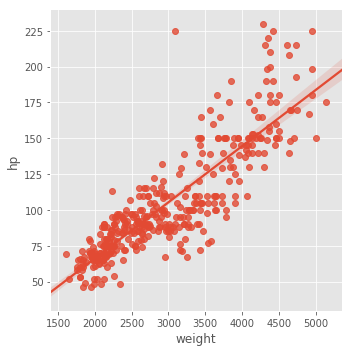

In [22]:
import numpy as np
import pandas as pd
auto = pd.read_csv('auto-mpg.csv')
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a linear regression between 'weight' and 'hp'
sns.lmplot(x ='weight', y ='hp', data =auto)

# Display the plot
plt.show()



### Plotting residuals of a regression
Often, you don't just want to see the regression itself but also see the residuals to get a better idea how well the regression captured the data. Seaborn provides sns.residplot() for that purpose, visualizing how far datapoints diverge from the regression line.

In this exercise, you will visualize the residuals of a regression between the 'hp' column (horse power) and the 'mpg' column (miles per gallon) of the auto DataFrame used previously.
**Here again the plot function also calculates the residuals of the linear regression.**

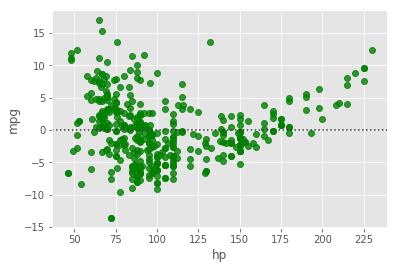

In [23]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a green residual plot of the regression between 'hp' and 'mpg'
sns.residplot(x ='hp', y ='mpg', data=auto, color ='green')

# Display the plot
plt.show()

### Higher-order regressions
When there are more complex relationships between two variables, a simple first order regression is often not sufficient to accurately capture the relationship between the variables. Seaborn makes it simple to compute and visualize regressions of varying orders.

Here, you will plot a second order regression between the horse power ('hp') and miles per gallon ('mpg') using sns.regplot() (**the function sns.lmplot() is a higher-level interface to sns.regplot()**). However, before plotting this relationship, compare how the residual changes depending on the order of the regression. Does a second order regression perform significantly better than a simple linear regression?

**A principal difference between sns.lmplot() and sns.regplot() is the way in which matplotlib options are passed (sns.regplot() is more permissive).**
For both sns.lmplot() and sns.regplot(), the keyword order is used to control the order of polynomial regression.
The function sns.regplot() uses the argument scatter=None to prevent plotting the scatter plot points again.

**The functions above such as lmplot(), regplot(), residplot() provide a way for very initial prototype study.** It can be very quick. 

**In the following code, it seems I must use the plt.scatter() before regplot(). Check why**

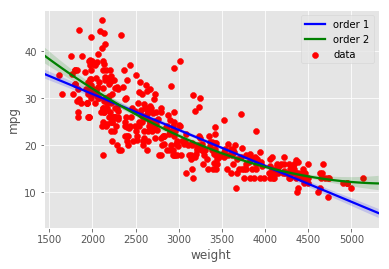

In [24]:
# Generate a scatter plot of 'weight' and 'mpg' using red circles
plt.scatter(auto['weight'], auto['mpg'], label='data', color='red', marker='o')

# Plot in blue a linear regression of order 1 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=auto, scatter=None, color='blue', label='order 1')

# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=auto, scatter=None, order=2, color='green', label='order 2')

# Add a legend and display the plot
plt.legend(loc='upper right')
plt.show()

### Grouping linear regressions by hue
Often it is useful to compare and contrast trends between different groups. Seaborn makes it possible to apply linear regressions separately for subsets of the data by applying a groupby operation. Using the hue argument, you can specify a categorical variable by which to group data observations. The distinct groups of points are used to produce distinct regressions with different hues in the plot.

In the automobile dataset - which has been pre-loaded here as auto - you can view the relationship between weight ('weight') and horsepower ('hp') of the cars and group them by their origin ('origin'), giving you a quick visual indication how the relationship differs by continent.

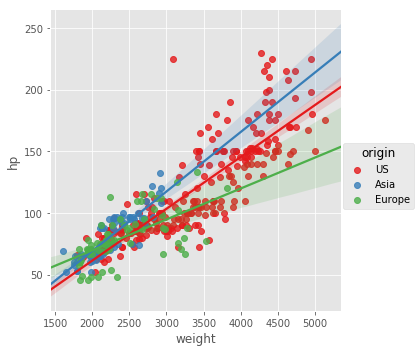

In [25]:
# Plot a linear regression between 'weight' and 'hp', with a hue of 'origin' and palette of 'Set1'
# Generate a scatter plot of 'weight' and 'mpg' using red circles
sns.lmplot(x ='weight', y ='hp', data =auto,palette ='Set1', hue = 'origin')
# Display the plot
plt.show()

Well done! It looks like US automobiles tend to have higher hp. 
**This is something new: group by**. This is useful when we have many features. Because we normally plot the regression between 2 features (3 is most for visualization), we can group by different other features.
### Grouping linear regressions by row or column
Rather than overlaying linear regressions of grouped data in the same plot, we may want to use a grid of subplots. The sns.lmplot() accepts the arguments row and/or col to arrangements of subplots for regressions.

You'll use the automobile dataset again and, this time, you'll use the keyword argument row to display the subplots organized in rows. That is, you'll produce horsepower vs. weight regressions grouped by continent of origin in separate subplots stacked vertically.


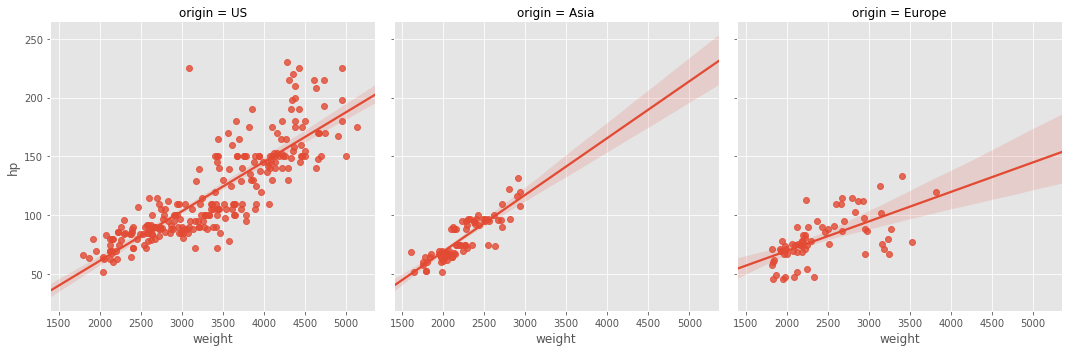

In [26]:
# Plot linear regressions between 'weight' and 'hp' grouped row-wise by 'origin'
sns.lmplot(x ='weight', y ='hp', data =auto,col = 'origin')
#I changed to col = 'origin' as this is better for my case.

# Display the plot
plt.show()

### Constructing strip plots
Regressions are useful to understand relationships between **two continuous variables**. Often we want to explore how the distribution of a **single continuous variable is affected by a second categorical variable**. Seaborn provides a variety of plot types to perform these types of comparisons between univariate distributions.

The strip plot is one way of visualizing this kind of data. It plots the distribution of variables for each category as individual datapoints. For vertical strip plots (the default), distributions of continuous values are laid out parallel to the y-axis and the distinct categories are spaced out along the x-axis.

For example, sns.stripplot(x='type', y='length', data=df) produces a sequence of vertical strip plots of length distributions grouped by type (assuming length is a continuous column and type is a categorical column of the DataFrame df).
Overlapping points can be difficult to distinguish in strip plots. The argument jitter=True helps spread out overlapping points.
Other matplotlib arguments can be passed to sns.stripplot(), e.g., marker, color, size, etc.  
**Difference between regression plot (regplot and lmplot) and strip plot. The former is for two continuous variable and the later is for one continuous and the other discrete.**

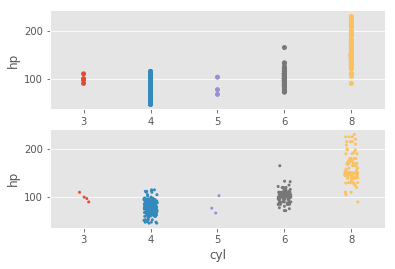

In [27]:
# Make a strip plot of 'hp' grouped by 'cyl'
plt.subplot(2,1,1)
sns.stripplot(x='cyl', y='hp', data=auto)

# Make the strip plot again using jitter and a smaller point size
plt.subplot(2,1,2)
sns.stripplot(x='cyl', y='hp', data=auto, jitter = True, size = 3)

# Display the plot
plt.show()

The option jitter is to spread the data. To do so, it is better change the size of data point.
### Constructing swarm plots
As you have seen, a strip plot can be visually crowded even with jitter applied and smaller point sizes. An alternative is provided by the swarm plot (sns.swarmplot()), which is very similar but spreads out the points to avoid overlap and provides a better visual overview of the data.
**See statistical part for what to do if swarmplot is not enough due to too many data**.

The syntax for sns.swarmplot() is similar to that of sns.stripplot(), e.g., sns.swarmplot(x='type', y='length', data=df).
The orientation for the continuous variable in the strip/swarm plot can be inferred from the choice of the columns x and y from the DataFrame data. The orientation can be set explicitly using orient='h' (horizontal) or orient='v' (vertical).
Another grouping can be added in using the hue keyword. For instance, using sns.swarmplot(x='type', y='length', data=df, hue='build year') makes a swarm plot from the DataFrame df with the 'length' column values spread out vertically, horizontally grouped by the column 'type' and each point colored by the categorical column 'build year'.
**Nice feature, it amounts to group by what already group by**
In this exercise, you'll use the auto DataFrame again to illustrate the use of sns.swarmplot() with grouping by hue and with explicit specification of the orientation using the keyword orient.

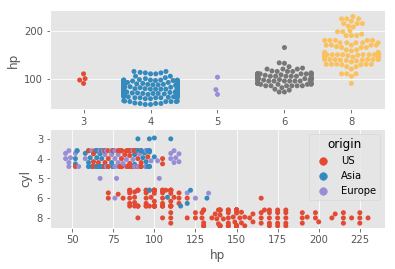

In [28]:
# Generate a swarm plot of 'hp' grouped horizontally by 'cyl'  
plt.subplot(2,1,1)
sns.swarmplot(x='cyl', y='hp', data=auto)

# Generate a swarm plot of 'hp' grouped vertically by 'cyl' with a hue of 'origin'
plt.subplot(2,1,2)
sns.swarmplot(x='hp', y='cyl', data=auto, hue='origin', orient='h')

# Display the plot
plt.show()


Be careful that cyl is not cy1 at all.
### Constructing violin plots
Both strip and swarm plots visualize all the datapoints. For large datasets, this can result in significant overplotting. Therefore, it is often useful to use plot types which reduce a dataset to more descriptive statistics and provide a good summary of the data. Box and whisker plots are a classic way of summarizing univariate distributions but seaborn provides a more sophisticated extension of the standard box plot, called a violin plot.

Here, you will produce violin plots of the distribution of horse power ('hp') by the number of cylinders ('cyl'). Additionally, you will combine two different plot types by overlaying a strip plot on the violin plot.

As before, the DataFrame has been pre-loaded for you as auto.


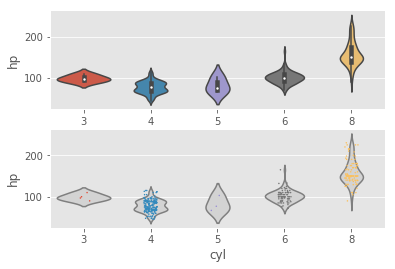

In [29]:
# Generate a violin plot of 'hp' grouped horizontally by 'cyl'
plt.subplot(2,1,1)
sns.violinplot(x='cyl', y='hp', data=auto)

# Generate the same violin plot again with a color of 'lightgray' and without inner annotations
plt.subplot(2,1,2)
sns.violinplot(x='cyl', y='hp', data=auto, inner=None, color='lightgray')

# Overlay a strip plot on the violin plot
sns.stripplot(x='cyl', y='hp', data=auto, jitter=True, size=1.5)

# Display the plot
plt.show()

### Plotting joint distributions (1)
There are numerous strategies to visualize how pairs of continuous random variables vary jointly. Regression and residual plots are one strategy. Another is to visualize a bivariate distribution.

Seaborn's sns.jointplot() provides means of visualizing bivariate distributions. The basic calling syntax is similar to that of sns.lmplot(). By default, calling sns.jointplot(x, y, data) renders a few things:

A scatter plot using the specified columns x and y from the DataFrame data.
A (univariate) histogram along the top of the scatter plot showing distribution of the column x.
A (univariate) histogram along the right of the scatter plot showing distribution of the column y.

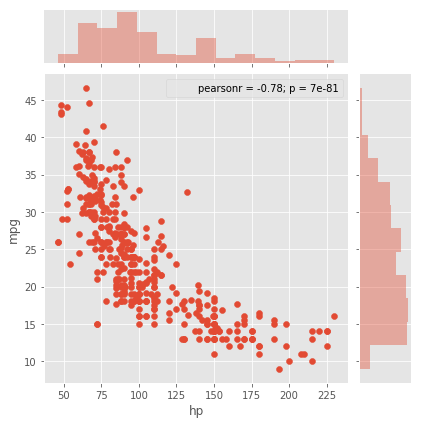

In [30]:
# Generate a joint plot of 'hp' and 'mpg'
sns.jointplot(x='hp',y='mpg', data = auto)

# Display the plot
plt.show()

<font color='red'>Make sure to understand the pValue</font>  
**Why not use a 2D PDF**?  Answer: In fact, it has this option. See later. Note for joint distributions of two variables (continuous or almost very condensed discrete data), there are many ways to show the joint distributions by changing the kind parameters. 

## Plotting joint distributions (2)
The seaborn function sns.jointplot() has a parameter kind to specify how to visualize the joint variation of two continuous random variables (i.e., two columns of a DataFrame)

kind='scatter' uses a scatter plot of the data points
kind='reg' uses a regression plot (default order 1)
kind='resid' uses a residual plot
kind='kde' uses a kernel density estimate of the joint distribution
kind='hex' uses a hexbin plot of the joint distribution
For this exercise, you will again use sns.jointplot() to display the joint distribution of the hp and mpg columns of the auto DataFrame. This time, you will use kind='hex' to generate a hexbin plot of the joint distribution.

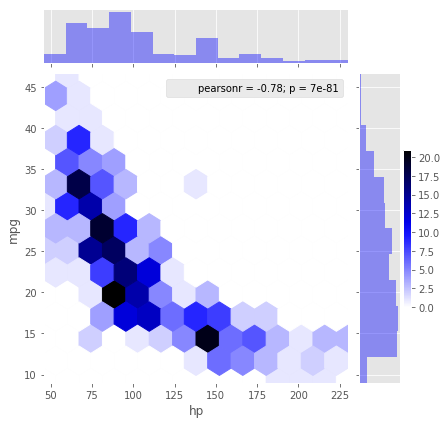

In [31]:
# Generate a joint plot of 'hp' and 'mpg' using a hexbin plot
sns.jointplot(x='hp', y = 'mpg', data = auto, kind = 'hex', color = 'b')
plt.colorbar()

# Display the plot
plt.show()

**Note I added a color bar (scale) and changed the color of the graph. The default is different from that of datacamp.** 

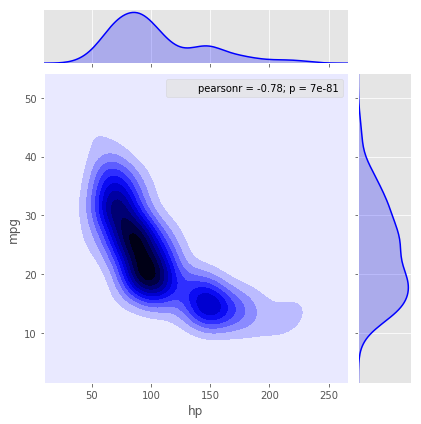

In [32]:
sns.jointplot(x='hp', y = 'mpg', data = auto, kind = 'kde', color = 'b')
# Display the plot
plt.show()

### Plotting distributions pairwise (1)
Data sets often contain more than two continuous variables. The function sns.jointplot() is restricted to representing joint variation between only two quantities (i.e., two columns of a DataFrame). Visualizing multivariate relationships is trickier.

The function sns.pairplot() constructs a grid of all joint plots pairwise from all pairs of (non-categorical) columns in a DataFrame. The syntax is very simple: sns.pairplot(df), where df is a DataFrame. The non-categorical columns are identified and the corresponding joint plots are plotted in a square grid of subplots. The diagonal of the subplot grid shows the univariate histograms of the individual columns (**I have changed this default to be 'kde'**).

In this exercise, you will use a DataFrame auto comprising only three columns from the original auto-mpg data set.

    mpg   hp  weight  accel  origin
0  18.0   88    3139   14.5      US
1   9.0  193    4732   18.5      US
2  36.1   60    1800   16.4    Asia
3  18.5   98    3525   19.0      US
4  34.3   78    2188   15.8  Europe


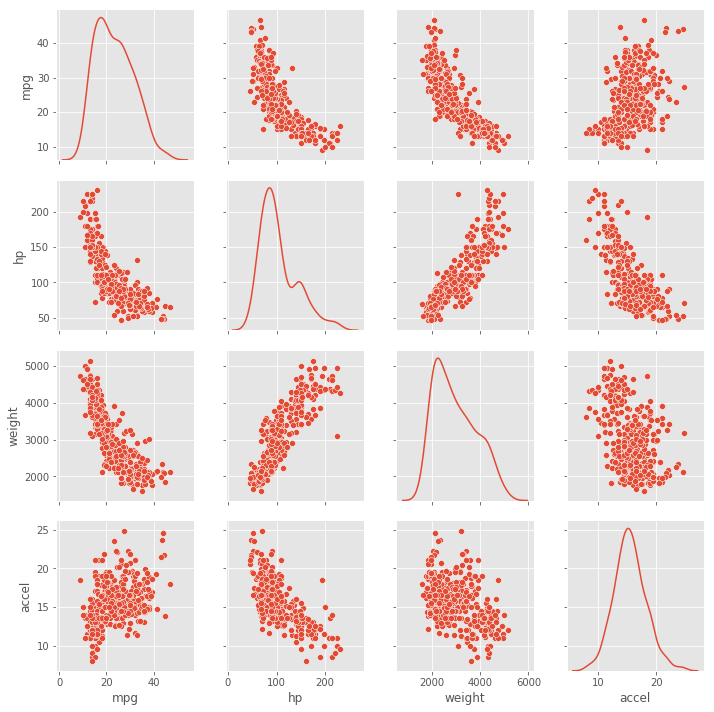

In [33]:
# Print the first 5 rows of the DataFrame
auto_reduced = auto[['mpg', 'hp', 'weight', 'accel', 'origin']]
print(auto_reduced.head())
# Plot the pairwise joint distributions from the DataFrame 
sns.pairplot(auto_reduced,diag_kind ='kde')
# Display the plot
plt.show()

**This is very nice to have a quick look on how the data are correlated before learning**.
**Note I have modified the type of diagonal to be 'kde'. default is 'hist'.**

### Plotting distributions pairwise (2)
In this exercise, you will generate pairwise joint distributions again. This time, you will make two particular additions:

You will display regressions as well as scatter plots in the off-diagonal subplots. You will do this with the argument kind='reg' (where 'reg' means 'regression'). Another option for kind is 'scatter' (the default) that plots scatter plots in the off-diagonal subplots.
You will also visualize the joint distributions separated by continent of origin. You will do this with the keyword argument hue specifying the 'origin'.



    mpg   hp  origin
0  18.0   88      US
1   9.0  193      US
2  36.1   60    Asia
3  18.5   98      US
4  34.3   78  Europe


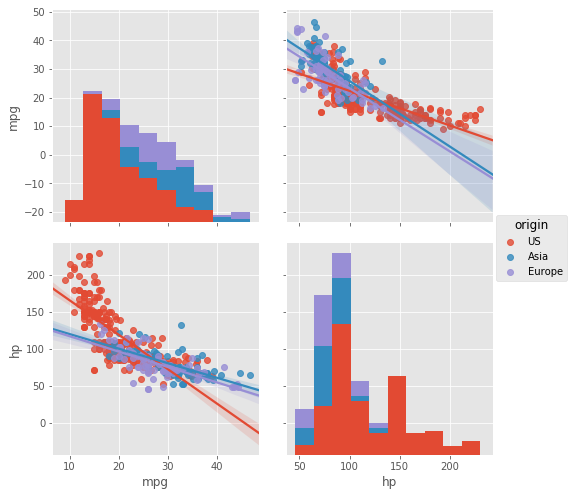

In [34]:
# Print the first 5 rows of the DataFrame
auto_reduced = auto[['mpg', 'hp', 'origin']]
print(auto_reduced.head())

# Plot the pairwise joint distributions grouped by 'origin' along with regression lines
sns.pairplot(auto_reduced, kind = 'reg',hue = 'origin',size = 3.5)

# Display the plot
plt.show()

### Visualizing correlations with a heatmap
Plotting relationships between many variables using a pair plot can quickly get visually overwhelming. It is therefore often useful to compute covariances between the variables instead. The covariance matrix can then easily be visualized as a heatmap. A heatmap is effectively a pseudocolor plot with labelled rows and columns (i.e., a pseudocolor plot based on a pandas DataFrame rather than a matrix). The DataFrame does not have to be square or symmetric (but, in the context of a covariance matrix, it is both).

In this exercise, you will view the covariance matrix between the continuous variables in the auto-mpg dataset. You do not have to know here how the covariance matrix is computed; the important point is that its diagonal entries are all 1s, and the off-diagonal entries are between -1 and +1 (quantifying the degree to which variable pairs vary jointly). It is also, then, a symmetric matrix.

In [35]:
cov_matrix = pd.read_csv('covariance.csv',sep = '\s+', index_col=0)  
cov_matrix

mpg        hp    weight     accel     displ
mpg     1.000000 -0.778427 -0.832244  0.423329 -0.805127
hp     -0.778427  1.000000  0.864538 -0.689196  0.897257
weight -0.832244  0.864538  1.000000 -0.416839  0.932994
accel   0.423329 -0.689196 -0.416839  1.000000 -0.543800
displ  -0.805127  0.897257  0.932994 -0.543800  1.000000

**I right click and copy the data looks like above and paste it into excel and save it as a csv file or just keep it as is. Then I read with the above sentence to restore the exact data frame**. This provides a simple way to handle simple and smaller dataframe from datacamp.

             mpg        hp    weight     accel     displ
mpg     1.000000 -0.778427 -0.832244  0.423329 -0.805127
hp     -0.778427  1.000000  0.864538 -0.689196  0.897257
weight -0.832244  0.864538  1.000000 -0.416839  0.932994
accel   0.423329 -0.689196 -0.416839  1.000000 -0.543800
displ  -0.805127  0.897257  0.932994 -0.543800  1.000000


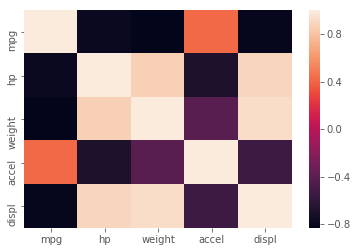

In [36]:
# Print the covariance matrix
print(cov_matrix)

# Visualize the covariance matrix using a heatmap
sns.heatmap(cov_matrix)

# Display the heatmap
plt.show()


## Analyzing time series and images
This chapter ties together the skills gained so far through examining time series data and images. This involves customizing plots of stock data, generating histograms of image pixel intensities, and enhancing image contrast through histogram equalization.

### Multiple time series on common axes
For this exercise, you will construct a plot showing four time series stocks on the same axes. The time series in question are represented in the session using the identifiers aapl, ibm, csco, and msft. You'll generate a single plot showing all the time series on common axes with a legend.  
**I added a critical point in the following code. Otherwise, the xticks will be too congested. See details below:**  
I read in the data and take the zero column as index. However, the index type is not datetime tpye. This will cause problems for plt.plot and plt.xticks. So I need transform the index to datetime64 type. Normally the syntax for transforming a column to datetime type is df`['columnname'] = pd.to_datetime(df['columnname'])`. However, for index it is different, as used below.  
See the course on visualizationTimeSeries. Sometimes the times series is read in not as the index. Pandas added an extra index column. In this case, the column might still be necessary to transformed into datetime64 type. However, to plot the figure, I need set the datetime type column to the index. 


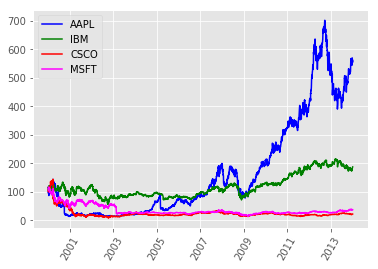

In [37]:
import numpy as np
import pandas as pd
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

df_stocks = pd.read_csv("stocks.csv", index_col = 0)
aapl = df_stocks['AAPL']
ibm = df_stocks['IBM']
csco = df_stocks['CSCO']
msft = df_stocks['MSFT']

 
aapl.index = pd.to_datetime(aapl.index)
ibm.index = pd.to_datetime(ibm.index)
csco.index = pd.to_datetime(csco.index)
msft.index = pd.to_datetime(msft.index)


# Plot the aapl time series in blue
#plt.plot(aapl.index.to_datetime(),aapl.values, color ='blue', label ='AAPL')
plt.plot(aapl, color ='blue', label ='AAPL')

# # Plot the ibm time series in green
plt.plot(ibm, color ='green', label ='IBM')

# # Plot the csco time series in red
plt.plot(csco, color ='red', label ='CSCO')

# # Plot the msft time series in magenta
plt.plot(msft, color = 'magenta', label = 'MSFT')

# Add a legend in the top left corner of the plot
plt.legend(loc='upper left')

# Specify the orientation of the xticks

#plt.xticks(np.arange(10), aapl.index['2000-01-13':'2013-12-31':350], rotation = 60)
#Need '' for date formate because it is 
plt.xticks(rotation=60)

# Display the plot
plt.show()


### Multiple time series slices (1)
You can easily slice subsets corresponding to different time intervals from a time series. In particular, you can use strings like '2001:2005', '2011-03:2011-12', or '2010-04-19:2010-04-30' to extract data from time intervals of length 5 years, 10 months, or 12 days respectively.

Unlike slicing from standard Python lists, tuples, and strings, when slicing time series by labels (and other pandas Series & DataFrames by labels), the slice includes the right-most portion of the slice. That is, extracting my_time_series['1990':'1995'] extracts data from my_time_series corresponding to 1990, 1991, 1992, 1993, 1994, and 1995 inclusive.
You can use partial strings or datetime objects for indexing and slicing from time series.
For this exercise, you will use time series slicing to plot the time series aapl over its full 11-year range and also over a shorter 2-year range. You'll arrange these plots in a 2×1 grid of subplots

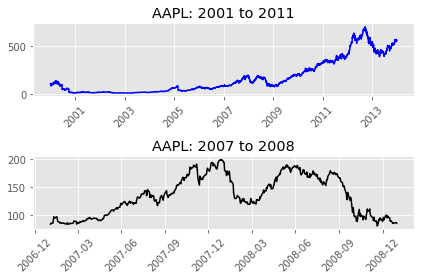

In [38]:
# Plot the series in the top subplot in blue
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('AAPL: 2001 to 2011')
plt.plot(aapl, color='blue')

# Slice aapl from '2007' to '2008' inclusive: view
view = aapl['2007':'2008']

# Plot the sliced data in the bottom subplot in black
plt.subplot(2,1,2)
plt.xticks(rotation=45)
plt.title('AAPL: 2007 to 2008')
plt.plot(view, color='black')
plt.tight_layout()
plt.show()


### Multiple time series slices (2)
In this exercise, you will use the same time series aapl from the previous exercise and plot tighter views of the data.

Partial string indexing works without slicing as well. For instance, using my_time_series['1995'], my_time_series['1999-05'], and my_time_series['2000-11-04'] respectively extracts views of the time series my_time_series corresponding to the entire year 1995, the entire month May 1999, and the entire day November 4, 2000.  
**Note it seems that new version does not accept such syntax. I need two parts in slicing, separated by :**

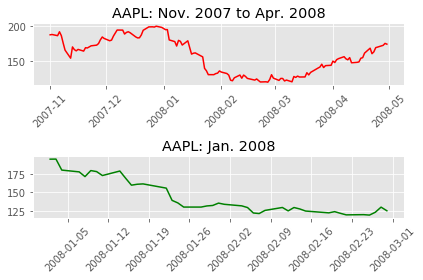

In [39]:
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view = aapl['2007-11':'2008-04']

# Plot the sliced series in the top subplot in red
plt.subplot(2,1,1)
plt.plot(view, color ='red')
plt.title('AAPL: Nov. 2007 to Apr. 2008')
plt.xticks(rotation =45)

# Reassign the series by slicing the month January 2008
#view = aapl['2008-01']
view = aapl['2008-01':'2008-02']

# Plot the sliced series in the bottom subplot in green
plt.subplot(2,1,2)
plt.plot(view,color = 'green')
plt.title('AAPL: Jan. 2008')
plt.xticks(rotation = 45)

# Improve spacing and display the plot
plt.tight_layout()
plt.show()


### Plotting an inset view
Remember, rather than comparing plots with subplots or overlayed plots, you can generate an inset view directly using plt.axes(). In this exercise, you'll reproduce two of the time series plots from the preceding two exercises. Your figure will contain an inset plot to highlight the dramatic changes in AAPL stock price between November 2007 and April 2008 (as compared to the 11 years from 2001 to 2011).

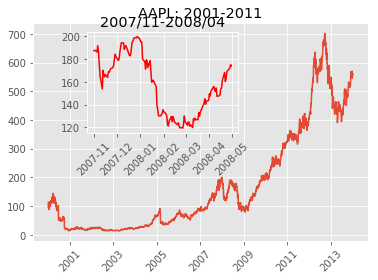

In [40]:
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view = aapl['2007-11':'2008-04']

# Plot the entire series 
plt.plot(aapl)
plt.xticks(rotation=45)
plt.title('AAPL: 2001-2011')

# Specify the axes
plt.axes([0.25,0.5,0.35,0.35])

# Plot the sliced series in red using the current axes
plt.plot(view,color = 'red')
plt.xticks(rotation=45)
plt.title('2007/11-2008/04')
plt.show()

### Plotting moving averages
In this exercise, you will plot pre-computed moving averages of AAPL stock prices in distinct subplots.

The time series aapl is overlayed in black in each subplot for comparison.
The time series mean_30, mean_75, mean_125, and mean_250 have been computed for you (containing the windowed averages of the series aapl computed over windows of width 30 days, 75 days, 125 days, and 250 days respectively).

**NO data to plot below**

NameError: name 'mean_30' is not defined

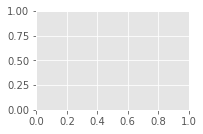

In [41]:
# Plot the 30-day moving average in the top left subplot in green
plt.subplot(2,2,1)
plt.plot(mean_30, color = 'green')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('30d averages')

# Plot the 75-day moving average in the top right subplot in red
plt.subplot(2,2,2)
plt.plot(mean_75, color = 'red')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('75d averages')

# Plot the 125-day moving average in the bottom left subplot in magenta
plt.subplot(2, 2, 3)
plt.plot(mean_125,color = 'magenta')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('125d averages')

# Plot the 250-day moving average in the bottom right subplot in cyan
plt.subplot(2,2,4)
plt.plot(mean_250,color = 'cyan')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('250d averages')

# Display the plot
plt.show()

**Ctrl + Tab to check plt.plot() options, 'k-.', k indicates black, -. indicates dash dot**
### Plotting moving standard deviations
Having plotted pre-computed moving averages of AAPL stock prices on distinct subplots in the previous exercise, you will now plot pre-computed moving standard deviations of the same stock prices, this time together on common axes.

The time series aapl is not plotted in this case; it is of a different length scale than the standard deviations.
The time series std_30, std_75, stdn_125, & std_250 have been computed for you (containing the windowed standard deviations of the series aapl computed over windows of width 30 days, 75 days, 125 days, & 250 days respectively).

**No data to show** Or I can calculate later in a quick way. 

In [42]:
# Plot std_30 in red
plt.plot(std_30, color = 'red', label='30d')

# Plot std_75 in cyan
plt.plot(std_75, color ='cyan', label ='75d')

# Plot std_125 in green
plt.plot(std_125,color='green', label = '125d')

# Plot std_250 in magenta
plt.plot (std_250,color = 'magenta', label ='250d')

# Add a legend to the upper left
plt.legend(loc = 'upper left')

# Add a title
plt.title('Moving standard deviations')

# Display the plot
plt.show()

NameError: name 'std_30' is not defined

### Extracting a histogram from a grayscale image
For grayscale images, various image processing algorithms use an image histogram. Recall that an image is a two-dimensional array of numerical intensities. An image histogram, then, is computed by counting the occurences of distinct pixel intensities over all the pixels in the image.

For this exercise, you will load an unequalized low contrast image of Hawkes Bay, New Zealand (originally by Phillip Capper, modified by User:Konstable, via Wikimedia Commons, CC BY 2.0). You will plot the image and use the pixel intensity values to plot a normalized histogram of pixel intensities.

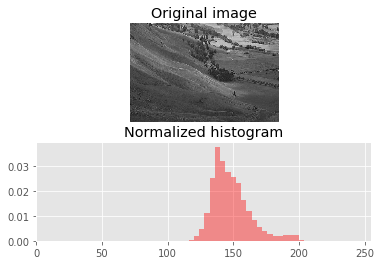

In [43]:
# Load the image into an array: image
image = plt.imread('640px-Unequalized_Hawkes_Bay_NZ.jpg')

# Display image in top subplot using color map 'gray'
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off') 
plt.imshow(image,cmap = 'gray')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
plt.xlim((0,255))
plt.title('Normalized histogram')
plt.hist(pixels,bins = 64, range= (0,256), normed = True, color = 'red', alpha = 0.4)

# Display the plot
plt.show()


**The axis for the top picture is off for clarity of the picture.**
### Cumulative Distribution Function from an image histogram
A histogram of a continuous random variable is sometimes called a Probability Distribution Function (or PDF). The area under a PDF (a definite integral) is called a Cumulative Distribution Function (or CDF). The CDF quantifies the probability of observing certain pixel intensities.

Your task here is to plot the PDF and CDF of pixel intensities from a grayscale image. You will use the grayscale image of Hawkes Bay, New Zealand (originally by Phillip Capper, modified by User:Konstable, via Wikimedia Commons, CC BY 2.0). This time, the 2D array image will be pre-loaded and pre-flattened into the 1D array pixels for you.

The histogram option cumulative=True permits viewing the CDF instead of the PDF.
Notice that plt.grid('off') switches off distracting grid lines.
The command plt.twinx() allows two plots to be overlayed sharing the x-axis but with different scales on the y-axis.

<class 'tuple'>


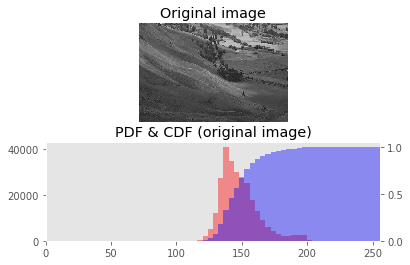

In [59]:
# Load the image into an array: image
image = plt.imread('640px-Unequalized_Hawkes_Bay_NZ.jpg')

# Display image in top subplot using color map 'gray'
plt.subplot(2,1,1)
plt.imshow(image, cmap='gray')
plt.title('Original image')
plt.axis('off')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
pdf = plt.hist(pixels, bins=64, range =(0,256), normed=False,
               color='red', alpha=0.4)
#The default hist() returns is PDF data and other two set of data. Here all three data are return to pdf as a tuple. If we
#want to separate them, I need proved three variables, as in the next example. 

plt.grid('off')

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()

# Display a cumulative histogram of the pixels
cdf = plt.hist(pixels, bins=64, range=(0,256),
               normed =True, cumulative=True,
               color='blue', alpha=0.4)
#When using the option cumulative = True, we can have cdf data. 
               
# Specify x-axis range, hide axes, add title and display plot
plt.xlim((0,256))
plt.grid('off')
plt.title('PDF & CDF (original image)')
plt.show()


**Can I use the hist() to replace the ECDF function I used before? For example, I can set the bin = 1. Try in the future.** 

**Some new features**  
* plt.twinx() allow two figures share the same x-axis but with different y-scale. 
* Again grid is off for clarity  
Notice that the histogram is not well centered over the range of possible pixel intensities. The CDF rises sharply near the middle (that relates to the overall grayness of the image).

### Equalizing an image histogram
Histogram equalization is an image processing procedure that reassigns image pixel intensities. The basic idea is to use interpolation to map the original CDF of pixel intensities to a CDF that is almost a straight line. In essence, the pixel intensities are spread out and this has the practical effect of making a sharper, contrast-enhanced image. This is particularly useful in astronomy and medical imaging to help us see more features.

For this exercise, you will again work with the grayscale image of Hawkes Bay, New Zealand (originally by Phillip Capper, modified by User:Konstable, via Wikimedia Commons, CC BY 2.0). Notice the sample code produces the same plot as the previous exercise. Your task is to modify the code from the previous exercise to plot the new equalized image as well as its PDF and CDF.

The arrays image and pixels are extracted for you in advance.
The CDF of the original image is computed using plt.hist().
Notice an array new_pixels is created for you that interpolates new pixel values using the original image CDF.  
Check reference on histogram equalization.  
https://en.wikipedia.org/wiki/Histogram_equalization  
Understand why such a way amounts to increasing contrast. How is it related to low-frequency filtering (contrast enhancement). 
**My understanding**.
* Suppose that there is only one big hike on just one gray scale value, then it is super uniform, and no contrast at all. 
* Suppose there is not just one gray scale, but they are very similar, or very close to each other is the histogram. This is also very uniform as the one-value case. 
* Both two cases above are very uniform without much contrast. This corresponds to very low spatial frequency. The algorithm for histogram equalization try to counter this extreme and want to have a uniform PDF (or linear CDF), and thus increase the contrast. 
* **In the future, figure out how interpolation gives histogram equalization. Also note the details of histogram function. It has three returns included in a tuple, which are necessary input of the interpolation function. Also it might output different things, depending the input parameters in plt.hist(). For example, unless we specify cumulative = True, otherwise the output is PDF data, right?**  


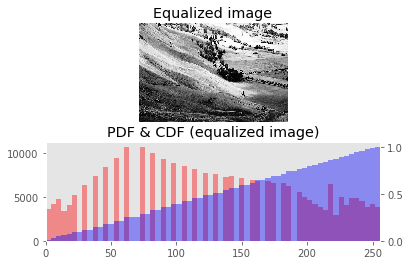

In [60]:
# Load the image into an array: image
image = plt.imread('640px-Unequalized_Hawkes_Bay_NZ.jpg')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Generate a cumulative histogram
cdf, bins, patches = plt.hist(pixels, bins=256, range=(0,256), normed=True, cumulative=True)

new_pixels = np.interp(pixels, bins[:-1], cdf*255)

# Reshape new_pixels as a 2-D array: new_image
new_image = new_pixels.reshape(image.shape) 


# Display the new image with 'gray' color map
plt.subplot(2,1,1)
plt.title('Equalized image')
plt.axis('off')
plt.imshow(new_image,cmap='gray')

# Generate a histogram of the new pixels
plt.subplot(2,1,2)
pdf = plt.hist(new_pixels, bins=64, range=(0,256), normed=False,
               color='red', alpha=0.4)
#

plt.grid('off')

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()
plt.xlim((0,256))
plt.grid('off')

# Add title
plt.title('PDF & CDF (equalized image)')

# Generate a cumulative histogram of the new pixels
cdf = plt.hist(new_pixels, bins=64, range=(0,256),
               cumulative=True, normed=True,
               color='blue', alpha=0.4)
plt.show()


**How 2D image is shaped into 1D array? After some processes, the 1D array is reshaped into the original shape: image.shape. See details above.**  
Need understand the principles of the above processing and how it is related PDF and CDF. Check other places. 
Histogram equalization can help make an image sharper.
### Extracting histograms from a color image
This exercise resembles the last in that you will plot histograms from an image. This time, you will use a color image of the Helix Nebula as seen by the Hubble and the Cerro Toledo Inter-American Observatory. The separate RGB (red-green-blue) channels will be extracted for you as two-dimensional arrays red, green, and blue respectively. You will plot three overlaid color histograms on common axes (one for each channel) in a subplot as well as the original image in a separate subplot.

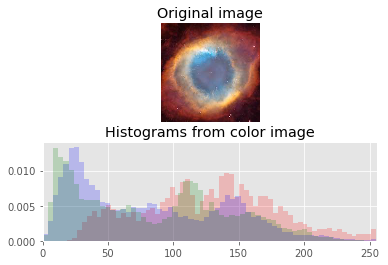

In [46]:
# Load the image into an array: image
image = plt.imread('hs-2004-32-b-small_web.jpg')

# Display image in top subplot
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image)

# Extract 2-D arrays of the RGB channels: red, blue, green
red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]

# Flatten the 2-D arrays of the RGB channels into 1-D
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

# Overlay histograms of the pixels of each color in the bottom subplot
plt.subplot(2,1,2)
plt.title('Histograms from color image')
plt.xlim((0,256))
plt.hist(red_pixels, bins=64, normed=True, color='red', alpha =0.2)
plt.hist(blue_pixels, bins=64, normed=True, color='blue', alpha =0.2)
plt.hist(green_pixels, bins=64, normed=True, color='green', alpha =0.2)

# Display the plot
plt.show()


Notice how the histogram generated from this color image differs from the histogram you generated earlier from a grayscale image.

### Extracting bivariate histograms from a color image
Rather than overlaying univariate histograms of intensities in distinct channels, it is also possible to view the joint variation of pixel intensity in two different channels.

For this final exercise, you will use the same color image of the Helix Nebula as seen by the Hubble and the Cerro Toledo Inter-American Observatory. The separate RGB (red-green-blue) channels will be extracted for you as one-dimensional arrays red_pixels, green_pixels, & blue_pixels respectively.

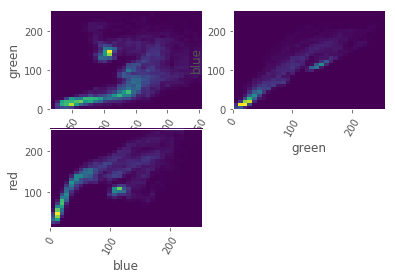

In [67]:
# Load the image into an array: image
image = plt.imread('hs-2004-32-b-small_web.jpg')

# Extract RGB channels and flatten into 1-D array
red, blue, green = image[:,:,0], image[:,:,1], image[:,:,2]
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

# Generate a 2-D histogram of the red and green pixels
plt.subplot(2,2,1)
plt.grid('off') 
plt.xticks(rotation=60)
plt.xlabel('red')
plt.ylabel('green')
plt.hist2d(red_pixels,green_pixels,bins=(32,32))

# Generate a 2-D histogram of the green and blue pixels
plt.subplot(2,2,2)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('green')
plt.ylabel('blue')
plt.hist2d(green_pixels,blue_pixels,bins=(32,32))

# Generate a 2-D histogram of the blue and red pixels
plt.subplot(2,2,3)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('blue')
plt.ylabel('red')
plt.hist2d(blue_pixels,red_pixels,bins=(32,32))

# Display the plot
plt.show()


**The hist() can not only do PDF like graph, but also do the CDF and thus might replace the my old ECDF diagram.** The key is using hist() can have many beautiful plots? However, for statistical plots, it is better have a summary on in which case, which graph is better. Using hist2D seems not so good as the sns.jointplot. For a type of plot, check how many ways are around. 